In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data from csv file
sr= pd.read_csv('sonar all-data.csv')
sr.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [3]:
# changing coloum name to identify them easily
sr.columns=range(0,61)
sr.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
9,0.0039,0.0063,0.0152,0.0336,0.0310,0.0284,0.0396,0.0272,0.0323,0.0452,...,0.0062,0.0120,0.0052,0.0056,0.0093,0.0042,0.0003,0.0053,0.0036,R
54,0.0201,0.0116,0.0123,0.0245,0.0547,0.0208,0.0891,0.0836,0.1335,0.1199,...,0.0076,0.0045,0.0056,0.0075,0.0037,0.0045,0.0029,0.0008,0.0018,R
164,0.0221,0.0065,0.0164,0.0487,0.0519,0.0849,0.0812,0.1833,0.2228,0.1810,...,0.0089,0.0051,0.0015,0.0075,0.0058,0.0016,0.0070,0.0074,0.0038,M
160,0.0305,0.0363,0.0214,0.0227,0.0456,0.0665,0.0939,0.0972,0.2535,0.3127,...,0.0200,0.0070,0.0070,0.0086,0.0089,0.0074,0.0042,0.0055,0.0021,M
156,0.0201,0.0178,0.0274,0.0232,0.0724,0.0833,0.1232,0.1298,0.2085,0.2720,...,0.0131,0.0049,0.0104,0.0102,0.0092,0.0083,0.0020,0.0048,0.0036,M


In [4]:
# checking shape
sr.shape

(207, 61)

In [5]:
# checking data type
sr.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [6]:
# checking the data description
sr.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [7]:
# checking null value
sr.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

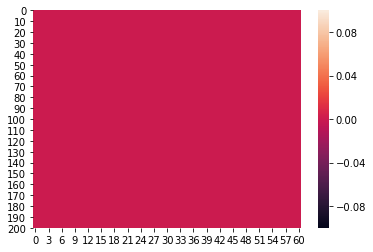

In [8]:
# heatmap of null value
sns.heatmap(sr.isnull())

In [9]:
# corelation between coloums
sr.corr()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.736104,0.571706,0.490853,0.345744,0.238824,0.262095,0.356312,0.356822,0.318440,...,0.255916,0.354348,0.310964,0.324101,0.311683,0.224784,0.319663,0.368413,0.357611,0.346302
1,0.736104,1.000000,0.779915,0.607297,0.419877,0.332319,0.279328,0.334747,0.317929,0.270787,...,0.320931,0.435641,0.346259,0.384526,0.380188,0.263959,0.282822,0.353061,0.352260,0.359010
2,0.571706,0.779915,1.000000,0.782662,0.546365,0.346271,0.190628,0.237974,0.253615,0.219641,...,0.238392,0.395121,0.333124,0.367687,0.289754,0.289393,0.383945,0.334122,0.425100,0.374256
3,0.490853,0.607297,0.782662,1.000000,0.729338,0.352901,0.248713,0.248131,0.252048,0.238136,...,0.177103,0.372377,0.363470,0.337358,0.284345,0.287941,0.349411,0.345537,0.421410,0.399262
4,0.345744,0.419877,0.546365,0.729338,1.000000,0.597438,0.334831,0.203590,0.176522,0.183240,...,0.115023,0.269478,0.316412,0.204402,0.197098,0.197829,0.218004,0.238749,0.290793,0.255220
5,0.238824,0.332319,0.346271,0.352901,0.597438,1.000000,0.703624,0.471942,0.329145,0.288639,...,0.172210,0.252509,0.162255,0.164595,0.133351,0.168382,0.163433,0.204027,0.220678,0.178027
6,0.262095,0.279328,0.190628,0.248713,0.334831,0.703624,1.000000,0.675612,0.469490,0.425675,...,0.182929,0.147402,0.047982,0.161645,0.196456,0.171433,0.183382,0.242632,0.183279,0.224536
7,0.356312,0.334747,0.237974,0.248131,0.203590,0.471942,0.675612,1.000000,0.779512,0.652635,...,0.260114,0.221356,0.103418,0.233340,0.240079,0.276214,0.266743,0.287568,0.194209,0.147350
8,0.356822,0.317929,0.253615,0.252048,0.176522,0.329145,0.469490,0.779512,1.000000,0.879711,...,0.172312,0.215365,0.109029,0.199749,0.181543,0.226605,0.186347,0.232078,0.096662,0.099233
9,0.318440,0.270787,0.219641,0.238136,0.183240,0.288639,0.425675,0.652635,0.879711,1.000000,...,0.167179,0.166151,0.097689,0.146820,0.175322,0.152548,0.141211,0.212272,0.058260,0.097528


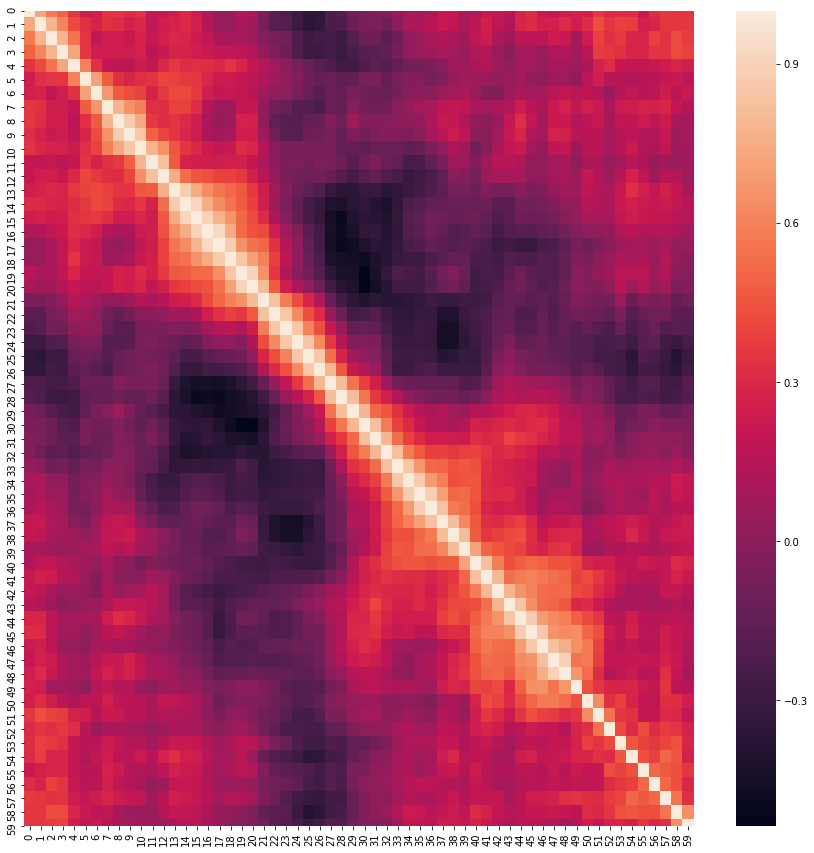

In [10]:
# heat map of corelation
corr_hmap=sr.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_hmap)

Visualizing the data

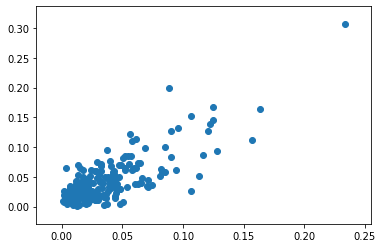

In [11]:
plt.scatter(sr.iloc[:,1],sr.iloc[:,2])
plt.show()

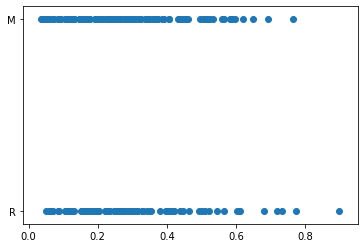

In [12]:
plt.scatter(sr.iloc[:,40],sr.iloc[:,60])
plt.show()

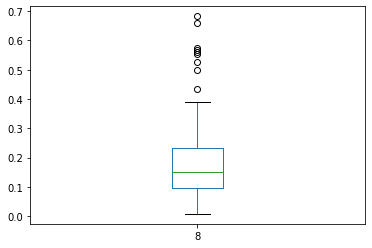

In [13]:
sr[8].plot.box()

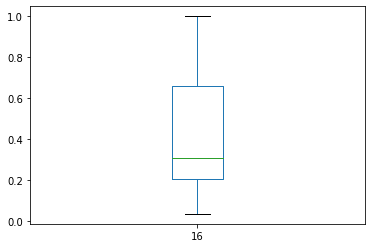

In [14]:
sr[16].plot.box()

In [15]:
#sr.plot(kind='box',subplots=True,layout=(8,8))

In [16]:
#sns.pairplot(sr)

In [17]:
# transforming the data in y to 0 & 1 using lable encoder
le=LabelEncoder()
sr[60]=le.fit_transform(sr[60])
sr[60]
sr.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
7,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,1
176,0.0201,0.0165,0.0344,0.0330,0.0397,0.0443,0.0684,0.0903,0.1739,0.2571,...,0.0054,0.0057,0.0137,0.0109,0.0035,0.0056,0.0105,0.0082,0.0036,0
124,0.0228,0.0853,0.1000,0.0428,0.1117,0.1651,0.1597,0.2116,0.3295,0.3517,...,0.0172,0.0191,0.0260,0.0140,0.0125,0.0116,0.0093,0.0012,0.0036,0
195,0.0050,0.0017,0.0270,0.0450,0.0958,0.0830,0.0879,0.1220,0.1977,0.2282,...,0.0165,0.0056,0.0010,0.0027,0.0062,0.0024,0.0063,0.0017,0.0028,0
149,0.0209,0.0278,0.0115,0.0445,0.0427,0.0766,0.1458,0.1430,0.1894,0.1853,...,0.0096,0.0014,0.0049,0.0039,0.0029,0.0078,0.0047,0.0021,0.0011,0


In [18]:
sr.skew()

0     2.122983
1     2.149965
2     2.645849
3     3.397590
4     2.020369
        ...   
56    1.685823
57    2.094443
58    1.736231
59    2.769687
60    0.146372
Length: 61, dtype: float64

In [19]:
for col in sr.columns:
    if sr.skew().loc[col]>0.55:
        sr[col]=np.cbrt(sr[col])
sr.skew()

0     0.616347
1     0.303348
2     0.416341
3     0.600093
4     0.323282
        ...   
56    0.360558
57    0.419360
58    0.173418
59    0.564577
60    0.146372
Length: 61, dtype: float64

In [20]:
#removing outlires
from scipy.stats import zscore
z=abs(zscore(sr))
print(sr.shape)
sr1=sr.loc[(z<3).all(axis=1)]
print(sr1.shape)

(207, 61)
(192, 61)


In [21]:
# dividing dataset into input values 'x' and output value 'y'
x=sr1.iloc[:,0:-1]
x.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.356478,0.373968,0.438473,0.409958,0.490902,0.636856,0.599629,0.703452,0.693615,0.659773,...,0.232079,0.203279,0.207235,0.168687,0.211045,0.267307,0.241014,0.169850,0.173248,0.163864
1,0.297007,0.387532,0.478997,0.476661,0.460101,0.610911,0.624111,0.722468,0.824159,0.852427,...,0.148881,0.285209,0.255095,0.211791,0.262074,0.290044,0.316152,0.254067,0.211791,0.198319
3,0.423954,0.405345,0.363676,0.340277,0.389300,0.401866,0.494472,0.627176,0.708999,0.763975,...,0.249867,0.145810,0.175441,0.218976,0.222398,0.114471,0.193098,0.168687,0.220358,0.211045
4,0.305813,0.356478,0.302571,0.259129,0.337373,0.462607,0.493379,0.568051,0.594864,0.672321,...,0.218279,0.165096,0.111869,0.156049,0.109139,0.207235,0.178632,0.139248,0.172130,0.183709
5,0.316485,0.457249,0.509293,0.520237,0.551127,0.555050,0.418125,0.519373,0.592784,0.705601,...,0.269161,0.271893,0.291620,0.235735,0.191293,0.239861,0.209538,0.242724,0.153262,0.217577


In [22]:
x.shape

(192, 60)

In [23]:
# performing pca on x for dimensionality-reduction 
pca=PCA(n_components=10) 
x=pca.fit_transform(x)
x.shape

(192, 10)

In [24]:
# standardizes the data in x using standerd scaler technique
scale=StandardScaler()
x=scale.fit_transform(x)

In [25]:
y=sr1.iloc[:,-1]
y.head()

0    1
1    1
3    1
4    1
5    1
Name: 60, dtype: int32

In [26]:
y.shape

(192,)

In [27]:
# function to find the maximum accuracy score against random state
def M_acc(model):
    max_acc_score=0
    for acc in range(10,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=acc)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
    
        accuracy=accuracy_score(test_y,pred)
        if accuracy>max_acc_score:
            max_acc_score=accuracy
            final_acc_state=acc
    
    return final_acc_state,max_acc_score

In [28]:
# function to print the various informaion related to a particular model
def mod(state,model_name):
    for m in model:      
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=state)
        m.fit(train_x,train_y)
        pred=m.predict(test_x)
        score=cross_val_score(m,train_x,train_y,cv=14,scoring='accuracy').mean()

        print(model_name,'Model score is:',m.score(train_x,train_y),'\n')
        print('Accuracy score of',model_name,'model is : ',accuracy_score(test_y,pred),'\n')
        print('The mean of cross_val_score for the',model_name,'model is:',score,'\n')
        print('Confusion matrix for the',model_name,'model is : \n',confusion_matrix(test_y,pred),'\n')
        print('Classification report for the',model_name,'model is : \n',classification_report(test_y,pred),'\n')

In [30]:
# LogisticRegression model
lr=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier(n_estimators=100, learning_rate = 0.01, max_depth = 5)
print('Max accuracy score for GradientBoostingClassifier model crossponding to random state is:',M_acc(gbc))
print('Max accuracy score for RandomForestClassifier model crossponding to random state is:',M_acc(rfc))
print('Max accuracy score for DecisionTreeClassifier model crossponding to random state is:',M_acc(dtc))
print('Max accuracy score for SVC model crossponding to random state is:',M_acc(svc))
print('Max accuracy score for GaussianNB model crossponding to random state is:',M_acc(gnb))
print('Max accuracy score for LogisticRegression model crossponding to random state is:',M_acc(lr))


Max accuracy score for GradientBoostingClassifier model crossponding to random state is: (45, 0.9230769230769231)
Max accuracy score for RandomForestClassifier model crossponding to random state is: (31, 0.9230769230769231)
Max accuracy score for DecisionTreeClassifier model crossponding to random state is: (45, 0.8717948717948718)
Max accuracy score for SVC model crossponding to random state is: (32, 0.9743589743589743)
Max accuracy score for GaussianNB model crossponding to random state is: (45, 0.9230769230769231)
Max accuracy score for LogisticRegression model crossponding to random state is: (54, 0.8717948717948718)


In [29]:
# LogisticRegression model
lr=LogisticRegression()
print('Max accuracy score crossponding to random state is:',M_acc(lr))

final_acc_state,max_acc_score = M_acc(lr)
lr_acc=max_acc_score

Max accuracy score crossponding to random state is: (54, 0.8717948717948718)


In [30]:
# GaussianNB model
gnb=GaussianNB()
print('Max accuracy score crossponding to random state is:',M_acc(gnb))

final_acc_state,max_acc_score = M_acc(gnb)
gnb_acc=max_acc_score

Max accuracy score crossponding to random state is: (45, 0.9230769230769231)


In [31]:
# SVC model
svc=SVC()
print('Max accuracy score crossponding to random state is:',M_acc(svc))

final_acc_state,max_acc_score = M_acc(svc)
svc_acc=max_acc_score

Max accuracy score crossponding to random state is: (32, 0.9743589743589743)


In [32]:
# DecisionTreeClassifier model
dtc=DecisionTreeClassifier()
print('Max accuracy score crossponding to random state is:',M_acc(dtc))

final_acc_state,max_acc_score = M_acc(dtc)
dtc_acc=max_acc_score

Max accuracy score crossponding to random state is: (45, 0.9230769230769231)


In [33]:
# RandomForestClassifier model
rfc=RandomForestClassifier()
print('Max accuracy score crossponding to random state is:',M_acc(rfc))

final_acc_state,max_acc_score = M_acc(rfc)
rfc_acc=max_acc_score

Max accuracy score crossponding to random state is: (55, 0.8974358974358975)


In [34]:
# GradientBoostingClassifier model
gbc=GradientBoostingClassifier(n_estimators=100, learning_rate = 0.01, max_depth = 5)
print('Max accuracy score crossponding to random state is:',M_acc(gbc))

final_acc_state,max_acc_score = M_acc(gbc)
gcb_acc=max_acc_score

Max accuracy score crossponding to random state is: (45, 0.9230769230769231)


In [35]:
# comparing the performances of all the model
model_performance = pd.DataFrame({
    'Model': ['RandomForestClassifier','SVC','GaussianNB','DecisionTreeClassifier','LogisticRegression','GradientBoostingClassifier'],
    'Accuracy': [rfc_acc,svc_acc,gnb_acc,dtc_acc,lr_acc,gcb_acc]
})

model_performance.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,SVC,0.974359
0,RandomForestClassifier,0.923077
2,GaussianNB,0.923077
5,GradientBoostingClassifier,0.923077
3,DecisionTreeClassifier,0.897436
4,LogisticRegression,0.871795


In [36]:
model=[SVC()]
mod(state=32,model_name='SVC')

SVC Model score is: 0.9477124183006536 

Accuracy score of SVC model is :  0.9743589743589743 

The mean of cross_val_score for the SVC model is: 0.8021645021645023 

Confusion matrix for the SVC model is : 
 [[22  0]
 [ 1 16]] 

Classification report for the SVC model is : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.94      0.97        17

    accuracy                           0.97        39
   macro avg       0.98      0.97      0.97        39
weighted avg       0.98      0.97      0.97        39
 



In [37]:
svc=SVC()
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=32)
svc.fit(train_x,train_y)
pred=svc.predict(test_x)
score=cross_val_score(svc,train_x,train_y,cv=14,scoring='accuracy').mean()

print('SVC model score',svc.score(train_x,train_y),'\n')
print('Accuracy score of model is : ',accuracy_score(test_y,pred),'\n')
print('The mean of cross_val_score for the model is:',score,'\n')
print('Confusion matrix for the model is : \n',confusion_matrix(test_y,pred),'\n')
print('Classification report for the model is : \n',classification_report(test_y,pred),'\n')

SVC model score 0.9477124183006536 

Accuracy score of model is :  0.9743589743589743 

The mean of cross_val_score for the model is: 0.8021645021645023 

Confusion matrix for the model is : 
 [[22  0]
 [ 1 16]] 

Classification report for the model is : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.94      0.97        17

    accuracy                           0.97        39
   macro avg       0.98      0.97      0.97        39
weighted avg       0.98      0.97      0.97        39
 

